## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0
User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64
[ 385  681  353  895  661  846  219  588   85  465  686  408  790  116
  118   54   90  372  926   94  338  134  821  294  597  567   20  108
  105  994  273  263  423   88   81  257  755  249  121  489  555  222
  590  645  689  646  964  384  826   27  268  466  411  445  428  974
  828  348  730  820  917   15  365  674   30  531  190  160  371  321
  230  819  965  351  266  629  891  311  439  861  510  277  417  123
  912  667  435  722  892  279  500  684  414  349  456  485  960  233
  191  471  977  120  126   23  225  772  398  367  511  775  324  829
  478  546  942  571  375  905  132  438 

ValueError: ignored

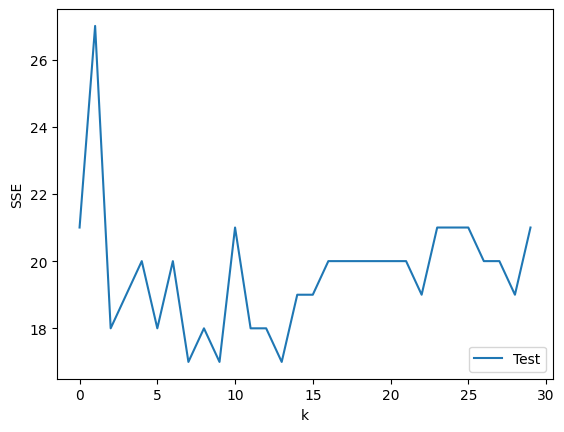

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Q1.1
df = pd.read_csv('./car_data.csv',low_memory=False)
print(df.head())
print(df.isnull().sum())

#Q1.2
var_user = 'User ID'
var_sex = 'Gender'
var_age = 'Age'
var_pay = 'AnnualSalary'
var_purch = 'Purchased'

print(df[var_user].unique())
print(df[var_user].describe(), '\n')
print(df[var_sex].unique())
print(df[var_sex].describe(), '\n')
print(df[var_age].unique())
print(df[var_age].describe(), '\n')
print(df[var_pay].unique())
print(df[var_pay].describe(), '\n')
print(df[var_purch].unique())
print(df[var_purch].describe(), '\n')

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
y = df[var_purch]
X = df.loc[:,[var_age, var_pay]]
print(X.head(),'\n')

#Q1.3
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X = X.apply(maxmin)
print(X.head(), '\n')
print(X.describe(), '\n')

#Q1.4
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


#Q1.5
k_bar = 30
k_grid = np.arange(1,k_bar)
sse_values = np.zeros(k_bar)
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  sse_values[k] = np.sum((y_test-y_hat)**2 )

plt.plot(np.arange(0,k_bar),sse_values,label='Test')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
# The optimal number of neighbors k is 9

#Q1.6
model = KNeighborsClassifier(n_neighbors=23)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)

pd.crosstab(y_test, y_hat)

model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)

pd.crosstab(y_test, y_hat)

# As far as I can see, it is pretty accurate with a 91% accuracy rate.

#Q1.7

# predict by sex
X_men, y_men = X[df['Gender'] == 'Male'], y[df['Gender'] == 'Male']
X_women, y_women = X[df['Gender'] == 'Female'], y[df['Gender'] == 'Female']

knn_men = KNeighborsClassifier(n_neighbors=9)
fitted_knn_men = knn_men.fit(X_men, y_men)

knn_women = KNeighborsClassifier(n_neighbors=9)
knn_women.fit(X_women, y_women)

fitted_model = model.fit(x_train.drop('Gender', axis=1), y_train)
y_hat = fitted_model.predict(x_test.drop('Gender', axis=1))

#



**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

   Unnamed: 0  price      brand    model  year   title_status  mileage  \
0           0   6300     toyota  cruiser  2008  clean vehicle   274117   
1           1   2899       ford       se  2011  clean vehicle   190552   
2           2   5350      dodge      mpv  2018  clean vehicle    39590   
3           3  25000       ford     door  2014  clean vehicle    64146   
4           4  27700  chevrolet     1500  2018  clean vehicle     6654   

    color                  vin        lot       state country      condition  
0   black    jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1  silver    2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2  silver    3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3    blue    1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4     red    3gcpcrec2jg473991  167763266     florida     usa  22 hours left  
Unnamed: 0      0
price           0
brand           0
model           0
year     

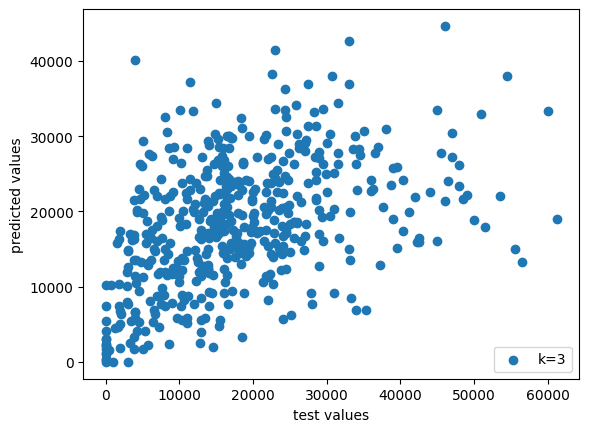

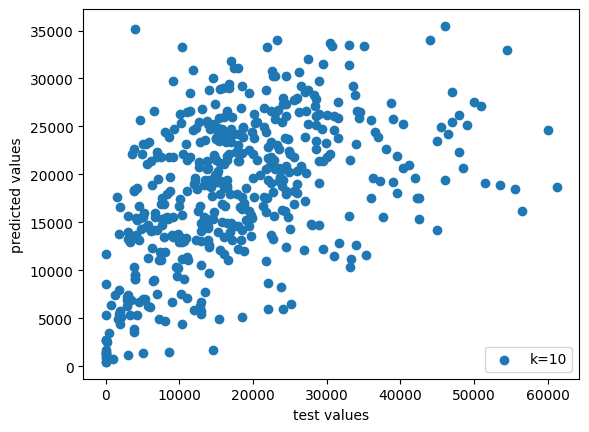

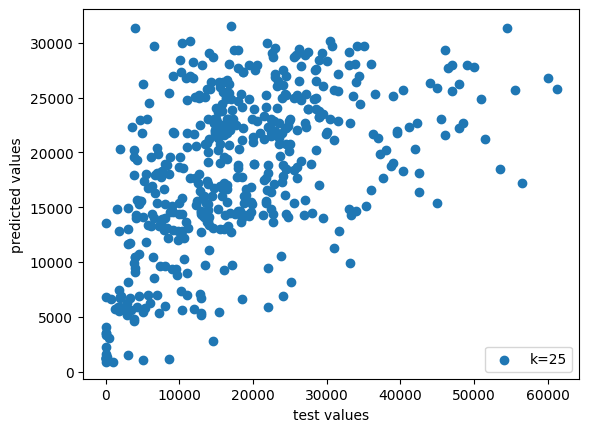

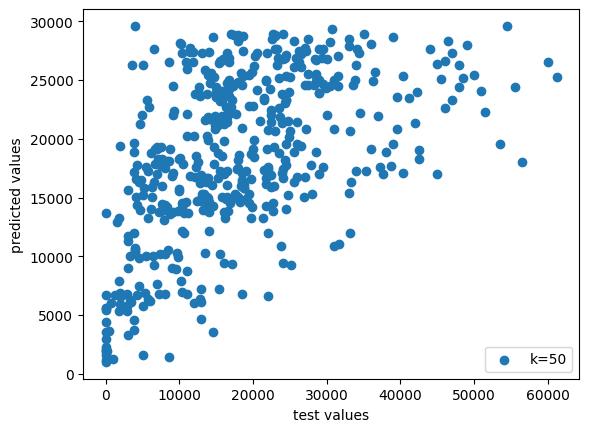

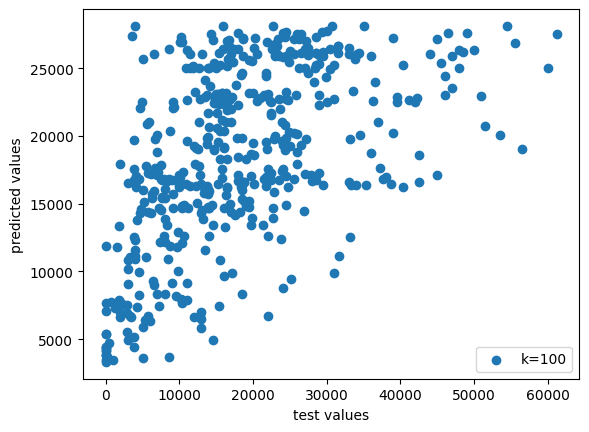

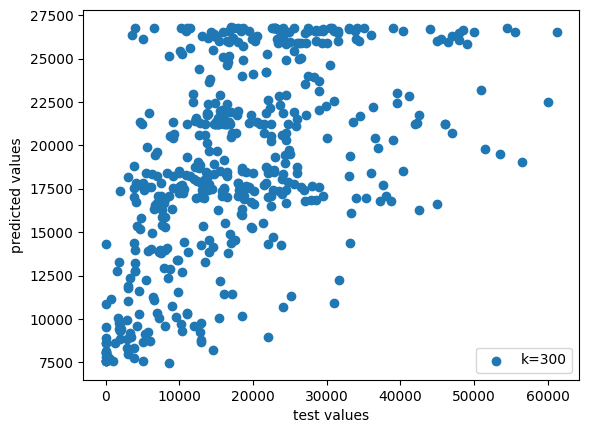

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

#Q2.1
df = pd.read_csv('./USA_cars_datasets.csv',low_memory=False)
print(df.head())
print(df.isnull().sum())

df = df[['price', 'year', 'mileage']]
X = df[['year', 'mileage']]
y = df['price']

#Q2.2
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X = X.apply(maxmin)
print(X.head(), '\n')
print(X.describe(), '\n')

#Q2.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

#Q2.4
k_values = [3, 10, 25, 50, 100, 300]
sse_values = []
predictions = []

for k in k_values:
    model = kNNRegression(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)

    sse = np.sum((y_test - y_hat) ** 2)
    sse_values.append(sse)

    plt.figure()
    plt.scatter(y_test, y_hat, label=f'k={k}')
    plt.xlabel('test values')
    plt.ylabel('predicted values')
    plt.legend(loc='lower right')
# A pattern I noticed that as K increased, the data became more and more spread out.

k_star = k_values[np.argmin(sse_values)]
SSE_min = np.min(sse_values)

#Q2.5
optimal_k = k_values[sse_values.index(min(sse_values))]
print(f'Optimal k: {optimal_k}')

#Q2.6
# As K increases, the scatterplot became smoother. However, with a very large value
# such as k=300, the model became too smooth and lost the ability to capture the data,
# resulting in underfitting. While the model when k=3 is too sensitive to individual
# data points, resulting in overfitting. Which is why I believe that 100 is the optimal k.



**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

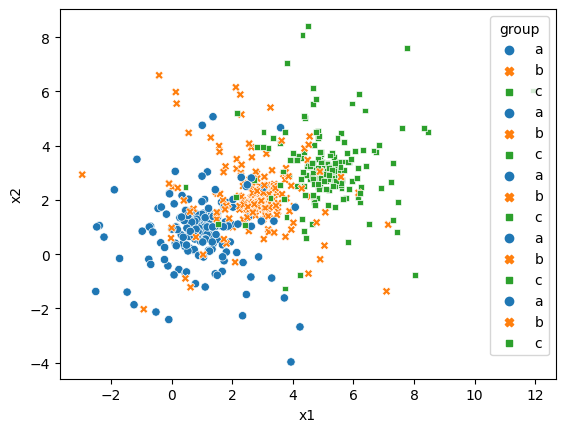

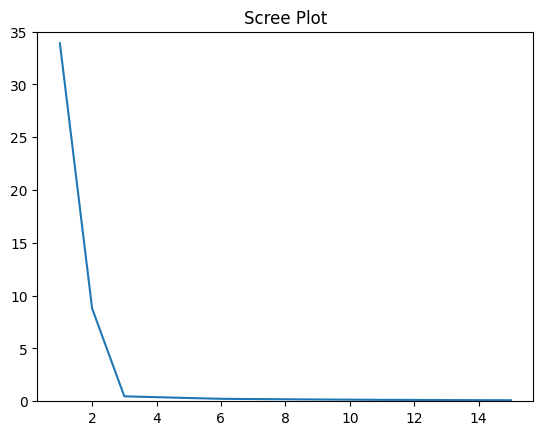

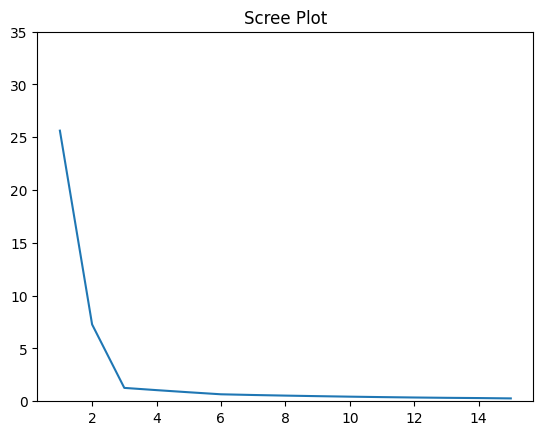

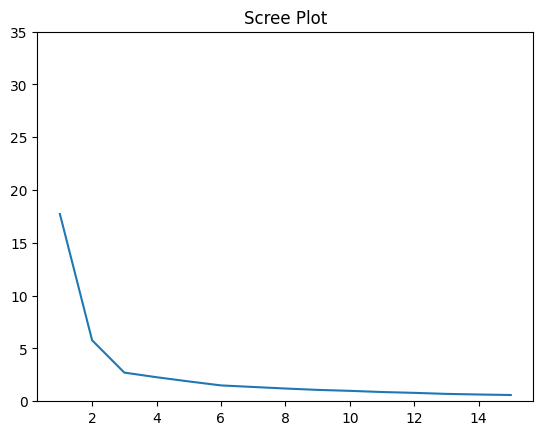

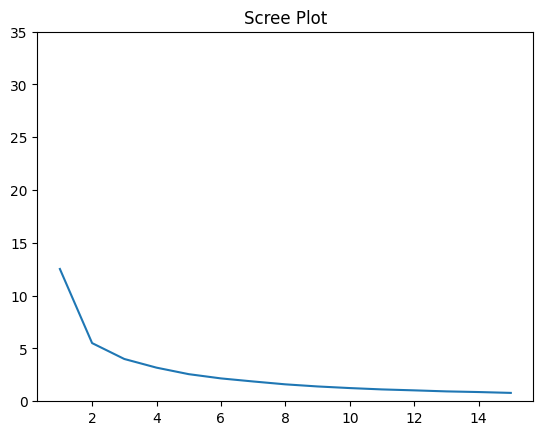

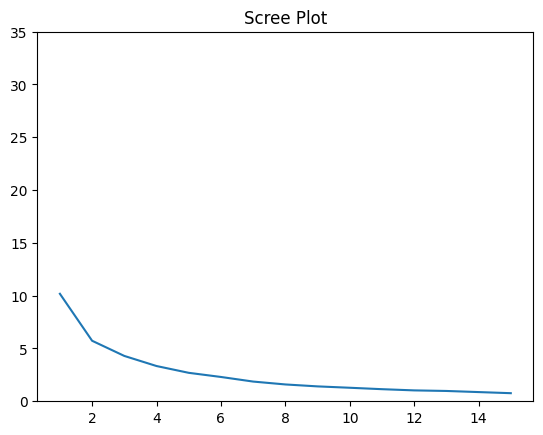

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

#Q6.2
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')
# what i noticed was that as the noise goes up, the clusters spread out and collided


#Q6.3
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x
def scree(data):
    X = data.loc[ : , ['x1','x2'] ]
    X = X.apply(maxmin)
    k_bar = 15
    k_grid = np.arange(1,k_bar+1)
    SSE = np.zeros(k_bar)
    for k in range(k_bar):
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
        model = model.fit(X)
        SSE[k] = model.inertia_
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
    axes.set_ylim(0, 35)
scree( data = df0_125 )
scree( data = df0_25 )
scree( data = df0_5 )
scree( df1_0 )


#Q6.4
# As the noise goes up, it is easier to determine the groups. But if things get
# messy and groups spread out, it becomes hard to tell how many groups there are
# or which points belong to each. In those cases, the method to find the best
# number of clusters might not work, and it won't be obvious where to split the
# data. If groups are very separate, we'll see a clear distinct elbow in the plot. But
# if the data is all mixed up, the plot will be smooth, and we won't see that elbow.


